In [4]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import pandas as pd

In [33]:
dataset = pd.read_csv('data/2022-feature-dataset.csv')
#dataset['Resultado'] = dataset.apply(lambda row: 1.0 if row['Resultado'] == 'Positivo' else 0.0,axis=1)
X = dataset.drop('Resultado',axis=1)
y = dataset['Resultado']


In [6]:
from sklearn.impute import SimpleImputer


imp = SimpleImputer(strategy="mean")
X_ = pd.DataFrame(imp.fit_transform(X), columns=X.columns)

In [37]:
importances = mutual_info_classif(X_,y)
importances

array([0.00116957, 0.00272105, 0.00164488, 0.00355442, 0.00655743,
       0.00553316, 0.00679651, 0.00113725, 0.00676663, 0.00682455,
       0.00312681, 0.00174063, 0.009926  , 0.        , 0.00326568,
       0.        , 0.01095856, 0.0030939 , 0.00848525, 0.01244455,
       0.00265615, 0.00842272, 0.00855576, 0.00152653, 0.0028836 ,
       0.        , 0.00197542, 0.        , 0.00275262, 0.00788966,
       0.00751022, 0.0025829 , 0.06734616, 0.06619962, 0.06811146,
       0.0759682 , 0.06735741, 0.06866691, 0.06679534, 0.06625371,
       0.0666325 , 0.06857475, 0.06643124, 0.06639891, 0.06668872,
       0.06128226, 0.06974235, 0.06900424, 0.07190697, 0.06837422,
       0.06777868, 0.06285825, 0.06837722, 0.07162253, 0.07111268,
       0.06709524, 0.07158051, 0.07090473, 0.07086657, 0.06760472,
       0.07194188, 0.07250077, 0.07125205, 0.06959015, 0.06770054,
       0.06826751, 0.06327082, 0.06467814, 0.06888089, 0.06426448,
       0.06429573, 0.06877788, 0.0693968 , 0.06574447, 0.07041

In [41]:
from sklearn.feature_selection import r_regression


importances = r_regression(X_,y)
importances

array([-0.01204083,  0.01656492,  0.02046896,  0.01779103,  0.02559387,
        0.03599466,  0.02475421,  0.01922035, -0.02308958,  0.00766517,
        0.0268976 ,  0.00530171,  0.0494526 ,  0.01998929,  0.0245903 ,
        0.0258115 ,  0.07161997,  0.04500658,  0.03525487,  0.03044038,
        0.02012657,  0.01526541, -0.00049068, -0.03283669, -0.03431856,
        0.00209218,  0.00631759,  0.00836838,  0.00962376,  0.02128019,
        0.02751311,  0.03352488, -0.10894125, -0.12033017, -0.12199791,
       -0.12114961, -0.10540482, -0.10854343, -0.09672321, -0.09997619,
        0.0949857 ,  0.11566239,  0.12417584,  0.12518028,  0.10801361,
        0.11517612,  0.11469065,  0.12130039,  0.09254072,  0.07385832,
        0.06402326,  0.08679763,  0.06324608,  0.07552908,  0.08666405,
        0.07357229,  0.09254072,  0.07385832,  0.06402326,  0.08679763,
        0.06324608,  0.07552908,  0.08666405,  0.07357229,  0.06876652,
        0.04127785,  0.04094813,  0.03224251,  0.02785756,  0.01

In [43]:
from sklearn.feature_selection import chi2


X_ = abs(X_)
importances = chi2(X_,y)
importances = importances[0]

In [46]:
from sklearn.feature_selection import f_classif


importances = f_classif(X_,y)
importances = importances[0]

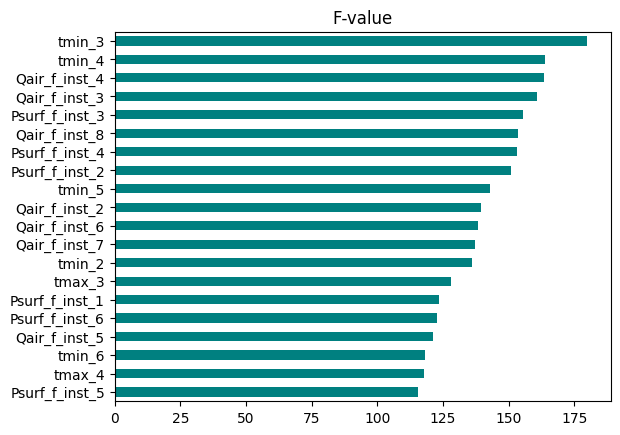

In [47]:

feat_importances = pd.Series(importances, X.columns)
feat_importances = feat_importances.sort_values(ascending=False).head(20)
feat_importances = feat_importances[::-1]

feat_importances.plot(title='F-value', kind='barh', color='teal')
plt.show()

In [ ]:
import seaborn as sns
import matplotlib as plt
sns.set(font_scale=0.5)

def chart_var(name):
    fig, axes = plt.pyplot.subplots(2, 4,  sharey=True)
    fig.suptitle(name)
    for i in range(1,9):
        sns.distplot(X_[name+'_'+str(i)],ax=axes[(i-1)//4,(i-1)%4])

def chart_boxplot(name):
    fig, axes = plt.pyplot.subplots(2, 4,  sharey=True)
    fig.suptitle(name)
    for i in range(1,9):
        sns.boxplot(data=dataset, 
                    x="Resultado", 
                    y= name+'_'+str(i), 
                    hue="Resultado",
                    ax=axes[(i-1)//4,(i-1)%4])


chart_var('Qair_f_inst')
chart_var('tmin')
chart_var('tmax')
chart_var('Psurf_f_inst')
chart_var('Tair_f_inst')
chart_var('Rainf_tavg')
chart_var('RootMoist_inst')

chart_boxplot('Qair_f_inst')
chart_boxplot('tmin')
chart_boxplot('tmax')
chart_boxplot('Psurf_f_inst')
chart_boxplot('Tair_f_inst')
chart_boxplot('Rainf_tavg')
chart_boxplot('RootMoist_inst')



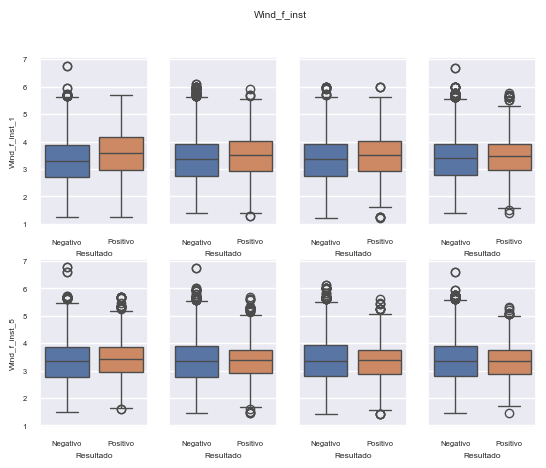

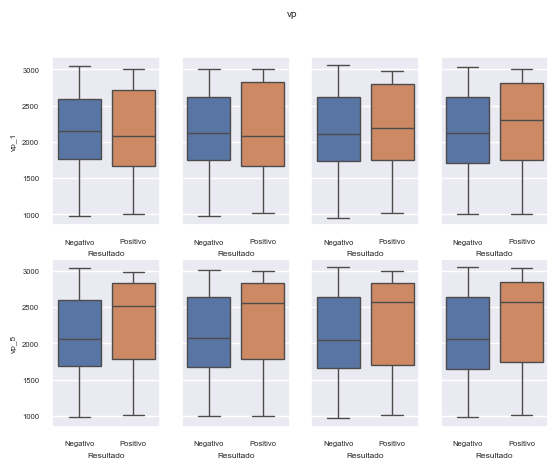

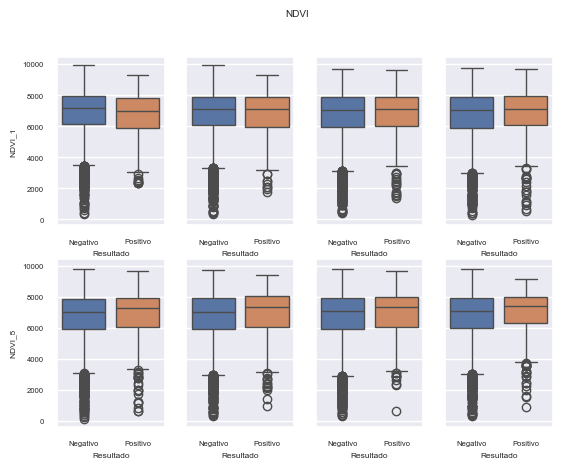

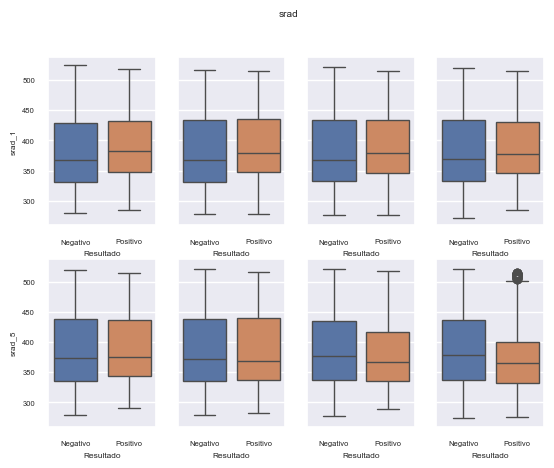

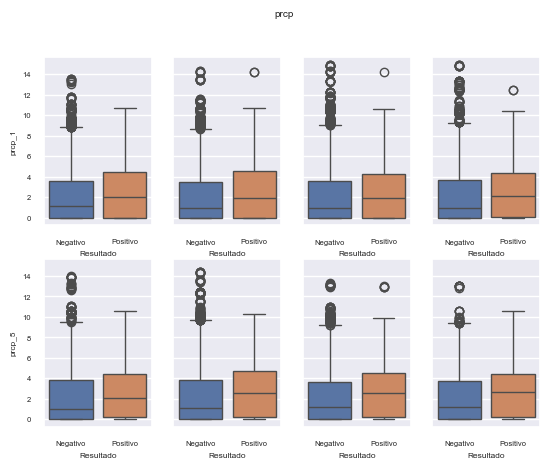

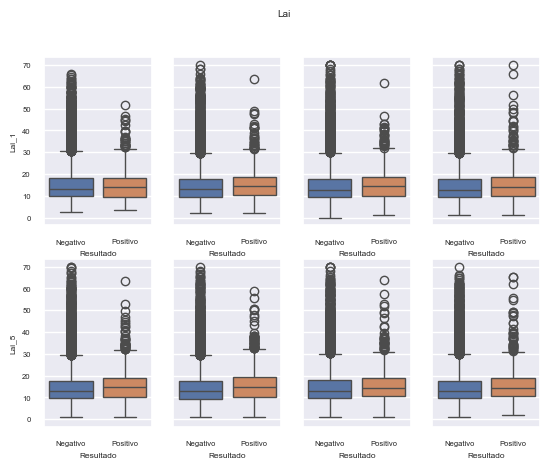

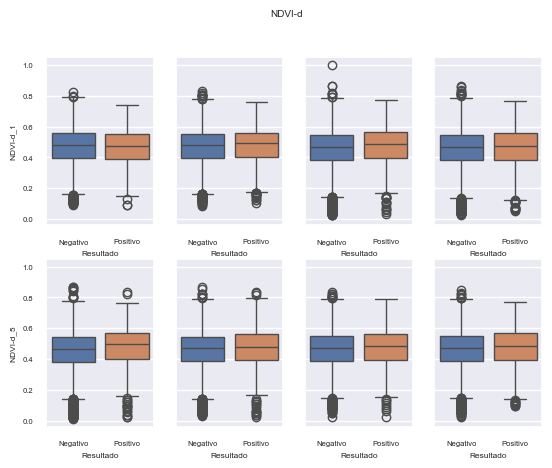

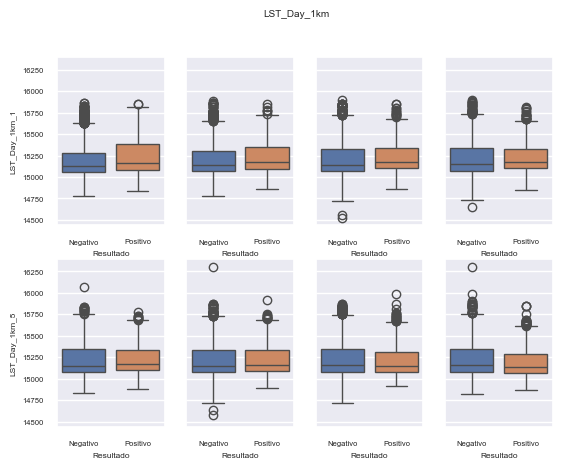

In [40]:
chart_boxplot('Wind_f_inst')
chart_boxplot('vp')
chart_boxplot('NDVI')
chart_boxplot('srad')
chart_boxplot('prcp')
chart_boxplot('Lai')
chart_boxplot('NDVI-d')
chart_boxplot('LST_Day_1km')

/var/folders/9n/kxcs2s054c32h_5hwhhg4bd40000gn/T/ipykernel_45631/1217518590.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_[name+'_'+str(i)],ax=axes[(i-1)//4,(i-1)%4])
/var/folders/9n/kxcs2s054c32h_5hwhhg4bd40000gn/T/ipykernel_45631/1217518590.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.di

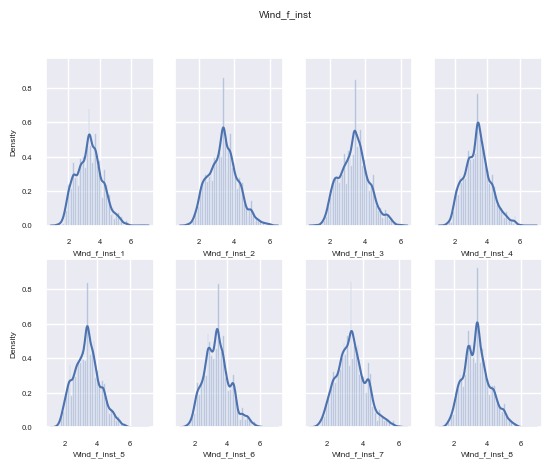

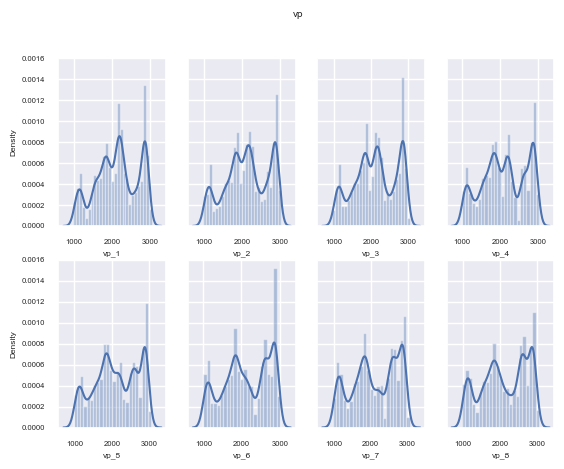

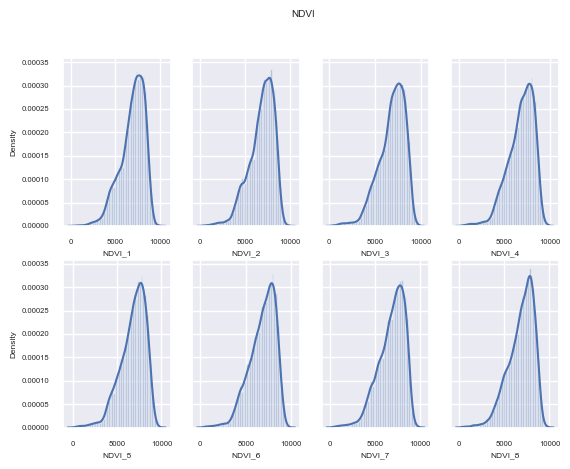

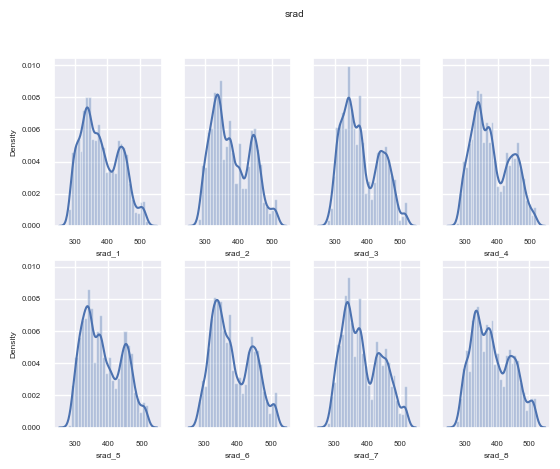

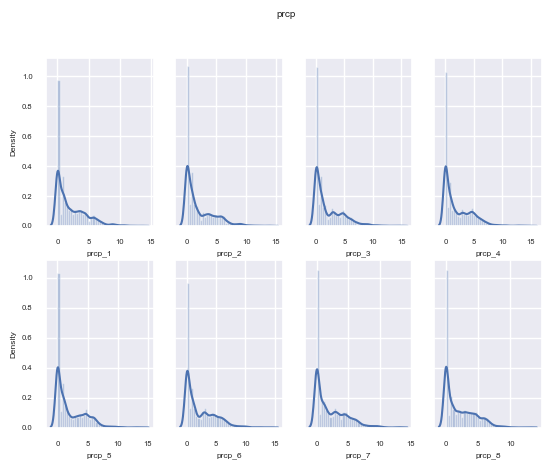

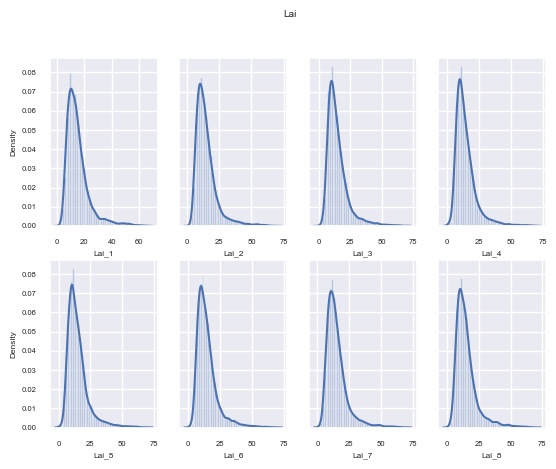

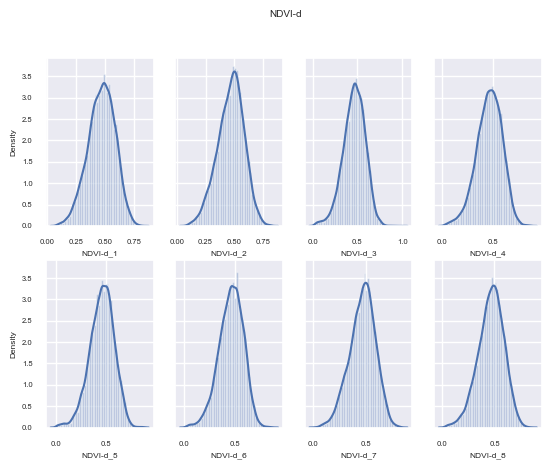

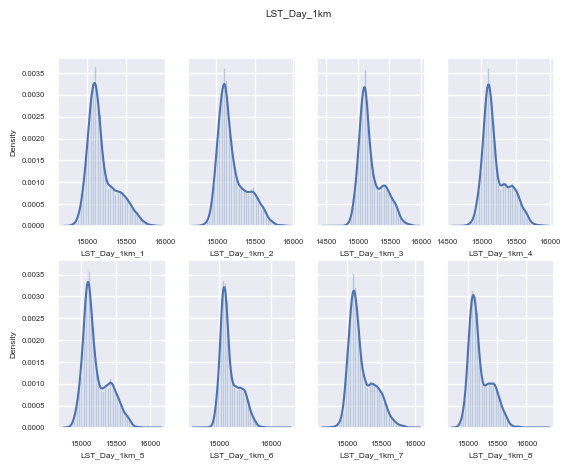

In [41]:
chart_var('Wind_f_inst')
chart_var('vp')
chart_var('NDVI')
chart_var('srad')
chart_var('prcp')
chart_var('Lai')
chart_var('NDVI-d')
chart_var('LST_Day_1km')